In [224]:
# 레이블 목록
labels_dic = {
    "수": 0,
    "덧셈": 1,
    "뺄셈": 2,
    "곱셈": 3,
    "나눗셈": 4,
    "분수": 5,
    "소수": 6,
    "소수점": 7,
    "길이": 8,
    "시간": 9,
    "화폐": 10,
    "측정": 11,
    "각도": 12,
    "평면도형": 13,
    "입체도형": 14,
    "도형": 15,
    "대칭": 16,
    "원": 17,
    "직각": 18,
    "비율": 19,
    "비례식": 20,
    "비": 21,
    "그래프": 22,
    "통계": 23,
    "확률": 24,
    "약수": 25,
    "배수": 26,
    "함수": 27,
    "미지수": 28,
    "규칙": 29,
}

In [225]:
# 1,2,3,4,5,6,7,25,26 => 수와 연산

# 15,13,14,17,16 => 도형

# 8,9,10,11,12,18 => 측정

# 19,20,21,29 => 규칙성

# 22,23,24 => 확률과 통계

In [2]:
import pandas as pd

df = pd.read_csv('./final.csv')

In [3]:
df.loc[df['category'] == '확률과 통계', 'combined_list']

20     ['브리', '시험', '운전', '데이터', '산포도', '수업', '바로', '...
69     ['통계', '데이터', '하기를', '포인트', '가서', '라면', '보는', ...
127    ['제일', '동현', '무조건', '부모', '부회장', '시간', '보면', '...
Name: combined_list, dtype: object

In [5]:
df['text'][0]

'이 텍스트를 한국어로 번역: \n\nGavin은 이런 말들이 있습니다. 아래의 각 사진에 있는 말의 수가 Gavin이 가진 말의 수보다 많은지, 적은지, 아니면 같은지 알아봅시다. 그러니 우선 Gavin이 얼마나 많은 말을 가지고 있는지 봅시다. 그는 하나, 둘, 셋, 넷, 다섯, 여섯 마리의 말을 가지고 있습니다. 좋습니다, 그것을 기억합시다. 그리고 이런 양의 말을 Gavin이 가진 여섯 마리의 말과 비교합시다. 그럼 여기를 봅시다. 여기서 우리는 하나, 둘, 셋, 넷, 다섯, 여섯 마리의 말을 가지고 있습니다. 그래서 이것은 Gavin이 가진 수와 같습니다. 그들은 단지 다르게 배열되어 있을 뿐입니다. 그래서 이것은 같습니다. 우리는 같은 양에 놓겠습니다. \n\n이제 여기서는 하나, 둘, 셋, 넷, 다섯 마리의 말을 가지고 있습니다. 그래서 이것은 Gavin이 가진 여섯 마리의 말보다 적습니다. 다섯은 여섯보다 적습니다. 이제 하나, 둘, 셋, 넷, 다섯과 다른 다섯, 즉 십 마리의 말을 볼 수 있습니다. 또는 하나, 둘, 셋, 넷, 다섯, 여섯, 일곱, 여덟, 아홉, 십으로 셀 수 있습니다. 줄곧, 십은 여섯보다 많습니다.. 십은 여섯보다 많으므로, 더 많은 양에 놓겠습니다.\n\n이제 여기에 넷과 넷이 있습니다. 그것은... 하나, 둘, 셋, 넷, 다섯, 여섯, 칠, 팔입니다. 다시 말해, 이것은 여기의 여섯보다 더 많습니다. 그것은 여섯보다 많습니다. 그리고 여기서 우리는 하나, 둘, 셋, 넷의 말을 가지고 있습니다. 그럼, 넷은 여섯보다 적습니다. 그래서 그것을 적은 양에 놓겠습니다. 그냥 이렇게. 그리고 우리의 대답을 확인해봅시다. 어떻게 했는지 알아봅시다. 고마워요. 우린 맞았구나.'

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('./final.csv')

# Step 1: Preprocess the text data (if needed, apply basic cleaning)
texts = df['text'].values
labels = df['category'].values

# Step 2: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Adjust max_features as needed
X = tfidf_vectorizer.fit_transform(texts).toarray()  # Convert sparse matrix to dense

# Step 3: Encode the labels using LabelEncoder and OneHotEncoder
label_encoder = LabelEncoder()
y_int = label_encoder.fit_transform(labels)  # Transform categories to integer labels

# One-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
y = onehot_encoder.fit_transform(y_int.reshape(-1, 1))  # One-hot encode the integer labels

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build a simple Dense Neural Network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y.shape[1], activation='softmax'))  # Output layer for classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=4, validation_split=0.2)

# Step 7: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Step 8: Predict and calculate accuracy using sklearn's accuracy_score
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_test_classes = y_test.argmax(axis=-1)

print(f"Accuracy: {accuracy_score(y_test_classes, y_pred_classes)}")


Epoch 1/10


d:\workspace\Chunjae_Bigdata_9th\9.4~9.23\.conda\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


21/21 [==============================] - 1s 29ms/step - loss: 1.2621 - accuracy: 0.7195 - val_loss: 0.6293 - val_accuracy: 0.8571
Epoch 2/10
21/21 [==============================] - 1s 25ms/step - loss: 0.5653 - accuracy: 0.8049 - val_loss: 0.5128 - val_accuracy: 0.8571
Epoch 3/10
21/21 [==============================] - 1s 27ms/step - loss: 0.4336 - accuracy: 0.8049 - val_loss: 0.4913 - val_accuracy: 0.8571
Epoch 4/10
21/21 [==============================] - 1s 25ms/step - loss: 0.3247 - accuracy: 0.8171 - val_loss: 0.4950 - val_accuracy: 0.8571
Epoch 5/10
21/21 [==============================] - 1s 26ms/step - loss: 0.2448 - accuracy: 0.9024 - val_loss: 0.5257 - val_accuracy: 0.7619
Epoch 6/10
21/21 [==============================] - 1s 26ms/step - loss: 0.1640 - accuracy: 0.9512 - val_loss: 0.5802 - val_accuracy: 0.7619
Epoch 7/10
21/21 [==============================] - 1s 27ms/step - loss: 0.1276 - accuracy: 0.9512 - val_loss: 0.6177 - val_accuracy: 0.7619
Epoch 8/10
21/21 [======

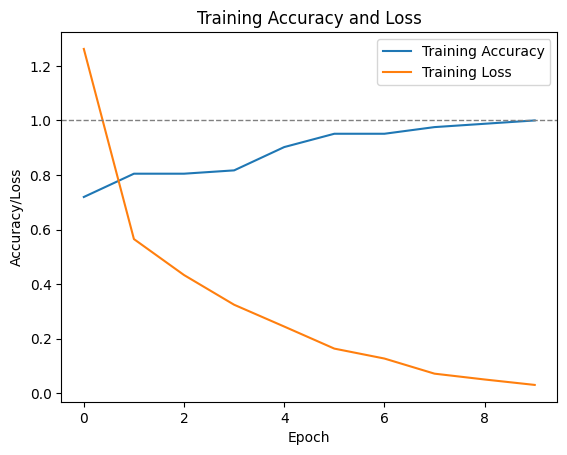

In [74]:
import matplotlib.pyplot as plt



plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.axhline(y=1, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

In [77]:
# 새로운 텍스트 데이터 (리스트로 여러 개를 테스트할 수 있음)
new_texts = ["""여러분 안녕하세요 정말 반갑습니다 김연경선생님 이에요 자 우리 친구들 오늘 배우는 원기둥의 건널비와 푸피요 내용이 만만치 않습니다 예습은 다 하셨나요? 선생님이요 EBS 사이트에 가면 자료실에 여러분의 교재를 올려놨어요 여러분은 선생님 수업을 받기 전에 반드시 다운로드 받으셔서 예습을 하고 그 다음 선생님을 만나러 오시기 바랍니다 자 그러면 오늘 배울 내용부터 확인해 보도록 할게요 학습 내용 보시죠 학습 내용 학습 내용 학습 내용 학습 내용 네 첫 번째 개념부터 알아볼게요 원기둥의 건널비 구하는 방법이라고 이렇게 나와 있습니다 자 우리 친구들 만만치 않아요? 계산이요 굉장히 복잡합니다 하지만 우리가 구하는 방법을 알고 있으면요 식을 적을 수 있죠 그 식을 적었으면 우리는 단순한 계산만 하면 되는 겁니다 그 방법을 지금 같이 배우도록 할게요 원기둥의 전개도를 보고 네모 안에 알맞은 수를 써넣으라고 했는데요 일단 그림부터 볼게요 우리가 지금 구하려고 하는 건 원기둥의 건널비에요 겉에 있는 것의 넓이죠 저번 시간에는 직육면체, 정육면체의 건널비를 구했는데요 이번에는 원이 나오고요 뭔가 둥근 면이 나오죠 조금 더 어렵습니다 하지만 그 방법만 알면요 계산하는 과정 단순 계산만 하면 됩니다 자 여기 한번 보세요 그림부터 자 동그라미, 원 그렇죠? 원이 이렇게 두 개가 있고요 그 다음에 직사각형 모양이 있어요 원기둥을 펼쳐놓은 전개도가 되죠 그러면 그 원기둥의 건널비를 구하고 싶거든요 어떻게 하면 되나요? 원기둥의 넓이니까 이 원의 넓이, 직사각형의 넓이 이거를요 다 그냥 더하면 됩니다 구해서요 그러면 지금부터 한번 같이 풀어보도록 할게요 자 먼저 1번에서는요 한 밑면의 넓이를 구하라고 했어요 자 여러분 밑면이 무엇인가요? 밑에 있는 면인가요? 아니죠 헷갈리는 친구들 안돼요 이 아래쪽에 위쪽에 있는 두 개 모두 아래쪽과 위쪽에 있는 거 모두 밑면이라고 해요 그래서 많이 헷갈리죠 이 둘 다 밑면인데 그 중에 하나만 구한다고 합니다 우리는 이 넓이만 구할 거예요 왜냐하면 이 넓이와 이 넓이는 서로 같죠? 이거 하나의 넓이만 우선 구해봅니다 원의 넓이를 구하면 되겠네요 반지름이 나와 있으니까 반지름 곱하기 반지름 곱하기 3.14 우리는 계산만 하면 되죠 여러분에게 이런 단순 계산은 맡기도록 할게요 12.56이 나와요 12.56 단위는 제곱 센티미터고요 선생님이요 이 하나의 넓이는 한 밑면의 넓이는 12.56제곱 센티미터다 단위를 생략하고 여기다 적어줄게요 우리 밑면의 넓이 구했어요 이거랑 이건 같으니까 여기까지는 되겠는데 여기를 지금 구해야 됩니다 그게 바로 2번에 나옵니다 그다음 화면 한번 보세요 이번에는 옆면의 넓이를 구해볼게요 옆면의 넓이는 바로 이 부분인데요 직사각형 부분인데요 직사각형의 넓이 어떻게 구하나요? 가로 곱하기 세로를 하면 되죠 세로는 나와 있어요 우리가 지금 구할 것은 가로의 길이만 구하면 됩니다 그런데 이 가로의 길이를 어떻게 구할까 고민이 됩니다 여러분 선생님이 원의 원주 부분 이 부분을 이렇게 표시를 하고요 그리고 직사각형에서 가로에 해당되는 이 부분을 이렇게 표시를 할게요 그리고 이건 전개도니까 원기둥을 만든다고 생각해봐요 이렇게 돌아서 한다면 이 부분과 이 부분이 서로 붙게 되네요 길이가 같다는 말이에요 우리가 이 가로 부분을 구하려면 이 원의 원주를 구하면 된다는 겁니다 원주는 어떻게 구해요? 지름의 약 3배라고 했어요 그런데 정확히 얘기하면 그것보다 정확히 얘기하면 3.14 이것도 정확한 값은 아니지만 우리는 계산할 때 이렇게 한다고 했어요 그런데 여기 지름이 나와 있지 않고 반지름이 나와 있어요 그래서 반지름의 2배가 지름이다 라고 하면 되죠 2 곱하기 2 곱하기 3.14 그래서 이것은 바로 가로의 길이가 되겠습니다 그러면 옆면의 넓이 어떻게 구해요? 가로의 길이 곱하기 세로의 길이 가로 곱하기 세로의 길이 이것을 하면 되죠 이것을 그대로 위에다 쓸게요 2 곱하기 2 곱하기 3.14 여기까지가 가로의 길이군요 이 뒤에 있는 3은 뭐예요? 세로의 길이 세로의 넓이가 나옵니다 이것을 계산하면 37.68이 나와요 선생님이 37.68도 한번 여기 옆에다가 표시를 해둘게요 이 옆면의 넓이는 37.68제곱센티미터인데요 단위는 생략하고요 이제 우리가 할 것은 마지막 3번에서 나옵니다 우리는 원기둥의 겉넓이를 구하고 싶어요 이거, 이거, 이거를 모두 더해야 되거든요 그런데 12.56제곱센티미터가 여기 하나, 여기 하나, 두 개가 있고요 여기 37.68제곱센티미터가 여기 하나 있어요 그러므로 여기 곱하기 2가 되어 있네요 12.56을 두 배를 해야 되겠죠 그러면 위에 거, 아래 거, 원의 넓이가 되고요 여기에다가는 이것을 쓰면 되죠 37.68을 쓰면 됩니다 단순 계산 여러분에게 맡길게요 계산을 하면요 62.8이 나와요 62.8 그리고 단위는 제곱센티미터 이렇게 적으시면 되겠습니다 자, 여러분 이렇게 해서요 원기둥의 겉넓이를 어떻게 구하냐 위쪽에 있는 거, 아래쪽에 있는 거, 옆쪽에 있는 거를 더하면 된다 그래서 하는 방법을 배웠습니다 한번 연습해보도록 할게요 자, 그다음 문제에서 원기둥의 전개도를 이용한 문제인데요 우리가 결국 하고 싶은 건 겉넓이를 구하려고 하는 거예요 문제 읽어보도록 하죠 태준이가 이런 전개도를 이용해서요 저금통을 만들기로 했대요 아, 이것을 이용해서 저금통을 만든대요 그런데 밑면에는 검정색 종이를 옆면에는 파란색 종이를 붙이려고 한대요 필요한 색종이의 넓이를 구하려고 합니다 자, 여러분 검정색 종이 밑면이래요 여기 여기 모두 밑면입니다 검정색, 검정색 그다음 옆면, 파란색, 파란색 종이 그래서 그 넓이를 구한 다음에 얼마만큼 색종이가 필요한가 1번부터 다음 화면에서 풀어보도록 할게요 검정색 종이는요 밑면이라고 했어요 밑면에 붙인대요 여기 부분에 붙인대요 그러면 어떻게 구하면 될까요?그러면 어떻게 구하면 될까요? 원의 넓이를 구한 다음에 그 원이 두 개가 있으니까 곱하기 2를 하면 되겠죠. 원의 넓이 반지름 곱하기 반지름 곱하기 3.14죠? 여기 반지름이 나와 있습니다. 반지름 곱하기 반지름 곱하기 3.14 하면요. 원 하나의 넓이가 나옵니다. 한 밑면의 넓이가 나오죠. 그런데 이런 게 몇 개 있어요? 두 개가 있잖아요. 그쵸? 이것을 단순 계산하면 되는데요. 여러분에게 부탁할게요. 그러면 100.48이 나옵니다. 그리고 단위는 여기가 cm이니까요. 제곱cm가 나오고 식 중간에 선생님이 답을 썼으니까 괄호를 이렇게 해줄게요. 자, 그러면 검정색 종이는 됐고요. 그다음 파랑색 종이도 한번 보도록 할게요. 파랑색 종이는요. 이 옆면에다 붙인다고 했어요. 이 옆면의 넓이를 우리가 지금 구해야 되는데요. 가로 곱하기 세로를 해야 됩니다. 세로는 여기 나와 있네요. 문제는 가로의 길이예요. 그런데 방금 선생님하고 개념 문제에서 풀어봤죠? 이 가로의 길이를 잘 생각해 보면 이거를 원기둥으로 만든다고 생각했을 때 이 부분이 뺑, 이 부분에 뺑 둘러서 이렇게 만들어지기 때문에 원주의 길이와 이 길이는 같다. 그래서 이 길이는 어떻게 구한다? 원주의 길이를 구하면 된다. 이 가로의 길이요. 자, 원주의 길이는요. 지름 곱하기 3.14인데 여기 반지름이 나와 있죠? 반지름의 2배가 지름이죠. 지름 곱하기 3.14을 하면 원주가 나와요. 이 원주의 길이는 즉, 여기의 길이입니다. 복잡하죠? 하지만 차근차근 생각하면 됩니다. 가로의 길이 나왔고요. 세로의 길이 알아요. 넓이 구하는 식 어렵지 않습니다. 4 곱하기 2 곱하기 3.14 가로의 길이에다가 세로의 길이를 곱해주면 됩니다. 그리고 우리는 단순 계산만 해주면 되죠? 150.72가 나오네요. 그리고 단위는 제곱 센티미터인데요. 식 중간에 선생님이 적었으므로 과로를 쳐주겠습니다. 그러면 여러분 기억하세요. 100.48, 150.72 자, 검정색, 파랑색 이렇게 붙여요. 그럼 이것과 이것을 더하면 필요한 색종이가 나오겠죠? 자, 3번에서 나옵니다. 방금 우리가 모두 구했고요. 검정색과 파랑색 그것을 그대로 더해주면 돼요. 100.48 더하기 150.72 150.72 방금 우리가 구한 거였어요. 이것을 계산만 하면 되는데요. 그러면 251.1.2가 나옵니다. 단위는 어떻게 되나요? 제곱 센티미터, 제곱 센티미터를 적어주시면 바로 정답이 되겠습니다. 자, 여러분 어렵지 않죠? 지금 우리가 한 것은 원기둥의 건너비를 구하는 거예요. 건너비를 구하려면 위에 있는 원, 아래 있는 원, 그 옆면인데 옆면은 전개도상에서 직사각형이었으니까 가루 곱하기 세로를 하면 된다. 그걸 기억하시면 됩니다. 방금 배운 거 정리해 보도록 할게요. 원기둥의 건너비 원기둥의 건너비 원기둥의 건너비 원기둥의 건너비 원기둥의 건너비 원기둥의 건너비 자, 여러분 오늘 이 영상과 함께 원기둥의 건너비도 구하고요. 부피도 구해요. 부피는 굉장히 쉽습니다. 문제는 건너비인데요. 그 이유는 지금 방금 우리가 공부한 것처럼 굉장히 복잡합니다. 자, 밀면도 생각해야 되고요. 옆면도 생각해야 되고요. 옆면에서 가루의 길이가 뭐가 되지 생각해야 됩니다. 하지만 우리가 식만 잘 적어놓고 단순 계산만 잘하면 문제없죠. 푸는 방법은 이해했을 거라고 생각해요. 두 번째 원기둥의 건너비인데요. 여기 부분에서는 응용문제가 많이 나와요. 선생님하고 재미있는 문제 많이 풀어봐요. 직사각형을 회전축을 중심으로 해서 일회전을 시킨대요. 여러분 회전체 아시죠? 여기 회전축이 있는데 이것을 일회전시키면 무엇이 됩니까? 회전을 쭉 시키면 원기둥이 되죠. 그럼 원기둥이 되는데 그 회전체의 건너비를 구하시오. 즉, 무엇이에요? 우리는 원기둥의 건너비를 구하면 됩니다. 그리고 이것을 회전시켰을 때 어떤 모양이 되는가? 그거를 상상을 할 수 있어야 되겠죠. 그럼 여러분 한번 상상해보죠. 자, 이게 뱅! 돌아서 회전을 했다. 그러면 이렇게 원 모양이 만들어지겠죠. 이 아래쪽에도 이렇게 해가지고 자, 선생님 그림을 잘 그리지는 못했는데 이런 원기둥이 될 거예요. 그래서 우리가 지금 할 것은 그 건너비를 구하면 됩니다. 밑면이 두 개예요. 원이 두 개 있고요. 옆면은 우리가 전개도로 봤을 때는 직사각형 모양이죠. 그걸 생각하면서 선생님이랑 해볼게요. 자, 먼저 밑면을 구할게요. 반지름이 4cm가 되네요, 여러분. 상상을 하셔야 돼요. 그림은 선생님이 좀 잘 못 그렸지만. 자, 반지름이 4cm이니까 반지름 곱하기, 반지름 곱하기 3.14 이것을 하면요, 한 원의 넓이가 나옵니다. 그런데 밑면이 몇 개예요? 두 개죠. 그러니까 여기에다가 2를 곱하면 두 개의 밑면의 넓이, 이런 두 개의 원, 밑면의 넓이가 나오죠. 그런데 이것만 계산하면 되는 것이 아니라 우리는 옆면의 넓이도 생각해야 되는데요, 여러분. 옆면은 여러분, 전개도상에서요. 이런 직사각형 모양이에요. 그럴 때, 자, 여기 세로 부분은 몇 cm인가요? 여기 있는 7cm이죠. 그러니까 여기는 7cm가 돼요. 자, 문제는 가로의 길이예요. 자, 가로의 길이는요, 아주 복잡합니다. 자, 이 가로의 길이는 밑면의 원주의 길이와 같다고 했어요. 밑면의 원주는 지름 곱하기 3.14인데요, 지름이 안 나와 있죠. 반지름은 나와 있어요. 반지름에다가 2배를 하면 바로 지름이 되고요. 지름에다가 약 3배, 3.14를 하면요, 이게 바로 원주, 원의 둘레의 길이가 나오고 그것이 바로 옆면에서 가로의 길이가 되는 거죠. 이거 곱하기 이거, 자, 이것도 cm가 되겠죠. 이거 곱하기 이거를 하면 바로 옆면의 넓이가 나옵니다. 선생님, 그대로 쓸게요. 4 곱하기 2 곱하기 3.14 이것이 가로의 길이였죠? 거기다가 7, 세로의 길이. 자, 이것을 단순 계산만 하면요, 우리가 구하고자 하는 겉넓이가 나옵니다. 선생님이 미리 계산을 해뒀어요. 자, 이 위쪽에 있는 밑면 2개의 넓이는요, 100.48이 나와요. 한번 직접 계산해보세요. 자, 그다음 옆면의 넓이, 이 부분의 넓이 단순 계산이죠? 175.84가 나옵니다. 우리는 이것을 그냥 더셈, 단순 계산만 하면 됩니다. 그래서 276.32가 나오고요. 단위로 쓰셔야 돼요. 단위는 제곱 센티미터인데, 선생님이 식 중간에 썼으니까 과로를 이렇게 쳤어요. 그러니까 괄호를 이렇게 쳤어요. 자, 우리 친구들 어때요? 응용 문제인데요. 우리가 건너비를 구하는 방법을 아니까 차근차근 식을 쓰니까 문제를 해결할 수 있겠죠. 자, 선생님이 중간중간에 단순 계산을 여러분에게 맡기고 있어요. 선생님은 푸는 방법을 최대한 많이 알려 주도록 할게요. 자, 다음에도 재미있는 문제가 나옵니다. 응용 문제가 나오는데요. 재밌다고 표현할 수도 있지만 다르게 얘기하면 어려운 문제예요. 하지만 여기까지 배운 거 이용해서 차근차근 하면 됩니다. 자, 전개도의 옆너비. 어, 옆너비가 딱 구해졌어요. 옆너비가 다음과 같은 원기중에 있습니다. 그런데 우리에게 지금 뭘 구하라고 하냐면요. 전체의 건너비를 구하래요. 자, 우리에게 주어진 건 옆면을 이렇게 보여줬어요. 그런데 우리가 지금 모르는 건 뭐예요? 전개도에 분명히 밑면이 이렇게 있을 거란 말이죠. 이렇게 원이 두 개가 있을 거란 말이죠. 그런데 이 부분을 우리가 구해서 전체의 건너비를 지금 구해야 되는 겁니다. 자, 그럼 여러분 한번 생각해 보세요. 어, 의외로 옆면의 너비는 아주 쉬워요. 직사각형의 너비 구하면 되죠. 가로 곱하기 세로 하면 바로 딱 나오네요. 그런데 문제는 뭐냐면요. 어, 우리가 원의 너비, 이 밑면의 너비를 구해야 되는데 그 밑면은 말이죠. 우리가 밑면의 너비 구하려면 어떻게 해야 돼요? 반지름 곱하기, 반지름 곱하기 3.14를 해야 되죠. 그런데 구해야 되겠다 하고 반지름을 보려고 하니까 반지름이 있어요? 반지름이 없죠. 우리는 반지름을 구해야 되는데 여기 나온 것을 이용해서 구해야 돼요. 자, 그럼 한번 여기 이제 선생님이 하나를 주워볼게요. 자, 여기 이 부분이 이렇게 나왔는데요. 여기에 길이가 나왔는데 그 말은요. 자, 선생님이 이 부분에다가 밑면을 그릴게요. 자, 그 말은요. 자, 크기가 좀 다르니까 이렇게. 자, 여기가 31.4라는 건 원의 원주가 31.4라는 거죠. 그럼 그 원주는 어떻게 나온 거예요? 우리 반지름을 한번 네모라고 해봐요. 우리가 네모라고 표현한 것은 바로 이 반지름 부분입니다. 반지름에다가 2를 곱하면 지름이 되죠. 지름에다가 3.14를 하면 원주가 나옵니다. 이 원주가 나와요. 그런데 그 원주가 바로 무엇이냐? 바로 이것이죠. 31.4죠. 이것이 31.4가 된다는 말이에요. 다시 한번 볼게요. 우리는 반지름을 몰라요. 이 반지름을 몰라요. 반지름에다가 2를 곱하면 지름이 나오죠. 지름에다가 3.14를 곱하면 원주가 나오는데 그 원주가 바로 이 부분이랑 길이가 같다. 그래서 이렇게 된다. 식이 나왔습니다. 그러면 이 식만 풀면 우리는 네모를 구할 수 있고요. 반지름을 알게 되는 거예요. 자, 네모 곱하기 2를 하면요. 31.4 나누기 3.14가 나온다는 거죠. 그러면 네모 곱하기 2를 하면 바로 10이 나온다는 말이거든요. 그 말은 네모가 바로 5라는 거예요. 이 네모가 무엇이었나요? 이걸 정답으로 쓰면 안 돼요. 네모는 바로 반지름의 길이였어요. 아, 그러므로 우리는 반지름의 길이를 구했으니까 이 원의 길이를 구할 수 있습니다. 원의 넓이요. 반지름 곱하기 반지름 곱하기 3.14 하면 이 원의 넓이가 나옵니다. 그런데 이 원의 넓이 몇 개 있어요? 여기도 있고 여기도 있죠. 위에 아래 있죠. 그래서 원의 넓이의 2배를 하면 바로 이것이 이 두 원, 두 밑면의 넓이가 됩니다. 거기에다가 이 직사각형도 더하셔야죠. 직사각형의 넓이는 31.4 곱하기 6. 아주 쉬워요. 그래서 이것을 단순 계산만 하면 우리가 구하고자 하는 건너비가 나오는 겁니다. 자, 그럼 여러분 위에 있는 것을 선생님이 미리 계산을 해뒀어요. 157이 나오고요. 이 아래쪽에 있는 이것을 계산을 하면 188.4가 됩니다. 그래서 이것을 모두 더하면 정답이 나와요. 바로 345.4가 나오고요. 단위를 쓰셔야죠. 제곱 센티미터 이렇게 적으시면 바로 정답이 되는 겁니다. 자, 그럼 우리 친구들 이렇게 해서 우리가 원기둥의 건너비를 구하는 방법을 배웠고요. 두 번째 개념, 여기에서는 응용문제를 배웠어요. 결코 쉬운 문제가 아니에요. 굉장히 어려운 문제예요. 하지만 기본적인 원리를 알고 있으면 차근차근 구할 수 있는 겁니다. 방금 배운 것도 정리해 보도록 할게요. 네, 여러분 수고하셨습니다. 오, 선생님 개념 안 끝나는데 왜 수고했다고 하시나요? 그 이유는요. 첫 번째, 두 번째 개념에서 우리가 건너비를 구했죠. 아주 복잡한 건 거의 다 끝났어요. 부피는 굉장히 쉽습니다. 자, 원기둥의 부피 마지막 개념에서 배울게요. 자, 원기둥을 그림과 같이 잘랐대요. 그래서 부피를 구하려고 한대요. 그 이유를 알아야겠죠. 옛날부터 사람들이 원기둥의 부피를 구하고 싶었어요. 원기둥의 건너비는 뭐예요? 겉에 있는 넓이잖아요. 그냥 구하면 되거든요. 부피는 원기둥이 이 공간에서 얼마만큼을 차지하느냐 그거거든요. 그러면 이 부피를 구하고 싶은데 어떻게 구할까 고민을 하다가요. 우리가 구할 수 있는 그런 부피의 모양을 한번 만들어 보자 해서 이 부피를 이 원기둥을 자르고 자르고 잘라서 이런 모양으로 만들었습니다. 그런데 어떻게 된 거냐면, 여기 잘게 자른 모습 여러분 보이시죠? 그것을 위쪽에 아래쪽에 위쪽에 아래쪽에 이렇게 지그재그로 놨어요. 그런데 이것을 점점 더 잘게 사람이 할 수 없는 데까지 잘게 그렇게 하다 보면 이런 둥글둥글 둥글 둥글둥글한 모양들이 거의 없어지면서 거의 완벽한 직육면체의 모양이 됩니다. 여러분 직육면체 부피 구할 수 있나요? 이 부피 구할 수 있죠. 그러면 이 원기둥의 부피가 이것이고 그것이 이것이고 다 같으니까 이 부피를 구하면 우리는 원기둥의 부피를 구할 수 있는 거죠. 이 부피는 어떻게 구해요? 가로 곱하기, 세로 곱하기, 높이, 밑면의 넓이 곱하기, 높이 하면 되죠. 그러면 이 그림에서 먼저 선생님하고 문제풀기 전에 한번 확인해 보도록 할게요. 이 가로의 길이를 먼저 구해야 되는데요. 가장 어려운 부분이에요. 여기 그림을 자세히 보면요. 동글동글동글동글한 부분이 있어요. 이 위쪽에서도 동글동글동글 동글동글동글한 부분이 있죠. 그러면 그 부분이 바로 어느 부분이냐? 원기둥에서 이 부분이 되겠죠. 동글동글한 부분. 그러면 우리는 지금 이 부분만 길이를 구하고 싶거든요. 어떻게 구하면 될까요? 이것과 이것을 위쪽과 아래쪽에 있는 걸 모두 더하면 바로 원주의 길이가 나와요. 원주의 길이가 나오는데 우리는 가로의 길이 하나만 알고 싶죠? 동글동글한 것 중에 반만 알고 싶은 거예요. 그러면 원주의 절반이구나 라는 걸 우리가 알 수 있는 거죠. 이 부분은 바로 원주의 절반이구나 라는 걸 알게 됐고요. 이 부분 볼까요? 이 부분은 바로 이 부분이잖아요. 이 부분은 바로 이 부분이잖아요 이 부분은 바로 원기 중에서 어떤 부분이에요 그림을 잘 보면 반지름 이라는 거 확인할 수가 있어요 그럼 이 부분 높이는 어떻게 돼요 높이는 바로 이 부분이죠 이 부분 이 부분은 원기 중에서 높이가 되는 거죠 그러므로 이것을 통해서 우리가 부피를 구할 수가 있는 겁니다 자 그럼 그 다음 문제 4번부터 확실히 해 볼게요 원주의 1분의 1과 길이가 같은 거를 한번 골라 보래요 원주의 1분의 1 자 원주는 바로 이것인데요 동그란 부분 있죠 그것의 1분의 1 절반 부분 뭔가요 원주가 여기와 여기에 나눠져 있어요 그런데 그 중에 한 부분 바로 이 부분이죠 그러므로 쉽죠 선생님이 다 설명한 거에요 바로 기억 이라고 적으시면 됩니다 아주 쉬워요 자 그 다음 2번도 한번 볼게요 자 이번에는 원기 중에 높이와 같은 걸 고르래요 원그린 높이 바로 이 부분이죠 이거와 같은 것은 바로 여기에 있네요 바로 디귿이 되겠습니다 선생님이 다 설명한 거에요 자 마지막 3번째 자 원기 중에 밀면의 반지름의 길이와 같은 걸 찾으래요 밀면의 반지름의 길이는요 바로 이 부분 맞나요 그림에서 잘 보면 바로 맞죠 그 부분이 바로 이 부분인가요 그렇습니다 그러므로 니은 하시면 돼요 자 그러면 일단 문제를 다 풀었는데요 여러분 이걸 통해서 우리가 알아야 될 거 우리가 이 부피를 구하려면 기억 곱하기 니은 곱하기 디귿을 해야 된다 기억이 은 디귿을 곱해야 된다 그런데 그게 결국 무엇이냐 결론적으로 얘기를 하자면요 원기둥의 부피를 구하는 것인데 원기둥의 한 밀면의 넓이 곱하기 높이를 한 것과 같아집니다 그래서 앞으로는 원기둥의 부피를 구할 때 밀면의 넓이를 구하고 거기에다 높이를 구한다 높이를 곱한다 그러면 원기둥의 부피가 된다 라는 원리를 여기에서 우리가 배우게 된 겁니다 이것을 꼭 기억하도록 하세요 자 우리 친구들 중에 무조건 외우는 친구들 있어요 원기둥의 부피는 한 밀면의 넓이 곱하기 높이 하는 친구들 있죠 하지만 이렇게 기본적인 원리를 이해하고 그걸 외운 친구들과 그냥 외운 친구는 좀 다릅니다 굉장히 다릅니다 응용 문제를 풀 수 있냐 없느냐는 이 원리를 일단은 알고 있느냐 모르고 있느냐 그거에 대해 그것으로 차이가 나는 거예요 자 그럼 이제 연습 문제도 한번 풀어 보도록 할게요 우리 건너비 구하느라 굉장히 고생하셨는데요 부피는 아주 쉽습니다 한 밀면의 넓이를 구하고요 높이만 곱하면 돼요 자 전개도를 접어서 만든 원기둥의 부피를 구하라고 했어요 자 한 밀면의 넓이 어떻게 구하나요 4 곱하기 4 곱하기 3.14 반지는 곱하기 반지는 곱하기 3.14 원의 넓이 한 밀면의 넓이죠 거기에다가 높이만 곱하면 돼요 바로 6이 되겠죠 이것을 계산만 하면 됩니다 단순 계산은 우리 친구들에게 선생님 맡긴다고 했어요 이것을 계산하면 301.44가 나옵니다 자 단위를 조심하셔야 돼요 센티미터 센티미터 센티미터 자 부피 부피는요 3제곱 센티미터라고 반드시 써야 되고요 이 센티미터가 가끔 미터로 나올 때가 있죠 그럴 땐 3제곱 미터라고 해야 돼요 3제곱 센티미터 이렇게 적으셔야 됩니다 자 그 다음 문제도 한번 풀면서 연습을 한번 해보도록 할게요 자 다음 문제 한번 보세요 부피가 이렇습니다 이런 원기둥의 높이를 지금 구하려고 합니다 몇 센티미터 입니까 아 이 문제는 특이하네요 부피가 주어졌어요 부피는 이미 주어졌구요 우리한테 높이를 구하래요 그러면 요 원기둥의 넓이 구할 원기둥의 부피를 구하는 식으로 쭉 쓰고 그것은 이것이다 라고 해서 네모를 구하면 되겠군요 원기둥의 부피 어떻게 구하나요 한밑면의 넓이 반지름 곱하기 반지름 곱하기 3.14 한밑면의 넓이에다가 높이만 곱하면 돼요 높이는 몰라요 네모로 그대로 합니다 곱하기 네모 이렇게 했더니 그랬더니 얼마가 나왔느냐 이것이 나왔대요 1256 1256이 나왔대요 우리는 계산만 하면 네모를 구하면 정답을 구할 수가 있는 것이죠 이 앞에 있는 거 먼저 계산해 봐요 100 곱하기 3.14 니까 314 가 되죠 곱하기 네모를 했더니 1256이 나왔대요 그러면 네모를 구하기 위해서는 1256 나누기 314 를 하면 되겠죠 단순 계산만 하면 됩니다 이것을 계산을 하면 4가 나오구요 자 여러분 단위는 어떻게 되나요 여기에 네모에 들어갈 건데 높이라고 했죠 높이는 센티미터 이죠 센티미터 우리가 부피를 계속 구하고 있다고 해서 여기 부피가 나오고 있죠 그래서 무조건 3제곱 센티미터 이렇게 적으면 절대로 안됩니다 정답은 4 센티미터 이렇게 적으시면 됩니다 자 이렇게 해서 여러분 오늘 부피를 구하는 것까지 알아보았습니다 방금 배운 것도 정리해 보도록 할게요 자 우리 친구들 정말 수고하셨습니다 오늘 공부 열심히 한 친구들이요 왕중왕 문제를 풀 수 있을 것 같은데요 한번 여러분의 실력을 테스트해 보세요 자 이 정답을 아는 친구들 어디에 올려주시나요 수감 후기 게시판이죠 거기에 꼭 올려주도록 하구요 저번 시간에 정답도 알려드려야겠죠 한 모서리의 길이가 되겠습니다 정답 잘 올려준 친구들 정말 축하합니다 자 여러분 공부하다가 모르는 게 있어요 다시 보고 싶어요 하는 친구들 다시 보기 EBS 사이트에서 이용하시면 되구요 다음 시간 예습을 하셔야 됩니다 자료실에 가셔서 교재를 다운로드 받아서요 38강 도영의 대칭 나오구요 여러분도 꼭 예습하고 다음 시간에 보도록 해야 됩니다 그럼 건강한 모습으로요 다음 시간에 보도록 할게요 모두 안녕"""]

# 1. 새로운 데이터 전처리 (TF-IDF로 변환)
new_X = tfidf_vectorizer.transform(new_texts).toarray()  # TF-IDF 벡터화 (학습한 벡터라이저 사용)

# 2. 모델로 예측
predictions = model.predict(new_X)

# 3. 예측 결과 디코딩 (가장 높은 확률을 가진 카테고리 선택)
predicted_label_indices = predictions.argmax(axis=-1)  # 가장 높은 확률을 가진 인덱스 반환

# 4. LabelEncoder를 사용해 예측된 인덱스를 원래 카테고리명으로 변환
predicted_labels = label_encoder.inverse_transform(predicted_label_indices)

# 결과 출력
for i, text in enumerate(new_texts):
    print(f"텍스트: {text}")
    print(f"예측된 카테고리: {predicted_labels[i]}")


1/1 [==============================] - 0s 14ms/step
텍스트: 여러분 안녕하세요 정말 반갑습니다 김연경선생님 이에요 자 우리 친구들 오늘 배우는 원기둥의 건널비와 푸피요 내용이 만만치 않습니다 예습은 다 하셨나요? 선생님이요 EBS 사이트에 가면 자료실에 여러분의 교재를 올려놨어요 여러분은 선생님 수업을 받기 전에 반드시 다운로드 받으셔서 예습을 하고 그 다음 선생님을 만나러 오시기 바랍니다 자 그러면 오늘 배울 내용부터 확인해 보도록 할게요 학습 내용 보시죠 학습 내용 학습 내용 학습 내용 학습 내용 네 첫 번째 개념부터 알아볼게요 원기둥의 건널비 구하는 방법이라고 이렇게 나와 있습니다 자 우리 친구들 만만치 않아요? 계산이요 굉장히 복잡합니다 하지만 우리가 구하는 방법을 알고 있으면요 식을 적을 수 있죠 그 식을 적었으면 우리는 단순한 계산만 하면 되는 겁니다 그 방법을 지금 같이 배우도록 할게요 원기둥의 전개도를 보고 네모 안에 알맞은 수를 써넣으라고 했는데요 일단 그림부터 볼게요 우리가 지금 구하려고 하는 건 원기둥의 건널비에요 겉에 있는 것의 넓이죠 저번 시간에는 직육면체, 정육면체의 건널비를 구했는데요 이번에는 원이 나오고요 뭔가 둥근 면이 나오죠 조금 더 어렵습니다 하지만 그 방법만 알면요 계산하는 과정 단순 계산만 하면 됩니다 자 여기 한번 보세요 그림부터 자 동그라미, 원 그렇죠? 원이 이렇게 두 개가 있고요 그 다음에 직사각형 모양이 있어요 원기둥을 펼쳐놓은 전개도가 되죠 그러면 그 원기둥의 건널비를 구하고 싶거든요 어떻게 하면 되나요? 원기둥의 넓이니까 이 원의 넓이, 직사각형의 넓이 이거를요 다 그냥 더하면 됩니다 구해서요 그러면 지금부터 한번 같이 풀어보도록 할게요 자 먼저 1번에서는요 한 밑면의 넓이를 구하라고 했어요 자 여러분 밑면이 무엇인가요? 밑에 있는 면인가요? 아니죠 헷갈리는 친구들 안돼요 이 아래쪽에 위쪽에 있는 두 개 모두 아래쪽과 위쪽에 있는 거 모두 밑면이라고 해요 그래서 많이 헷

In [78]:
model.save('best_model1.keras')

In [79]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential

# 학습한 TF-IDF 벡터라이저를 pickle로 저장
with open('tfidf_vectorizer1.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)